<a href="https://colab.research.google.com/github/cmskzhan/helloworld/blob/master/concepts/python/public/scikit-linearegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scikit-Learn - Linear and Logic Regression

## Linear Regression

$ Y = mX + c $

In [13]:
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [14]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_breast_cancer
from pandas_datareader import data as web

In [15]:
df = web.DataReader("MSCI", data_source='yahoo', start='01-01-2015')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684
...,...,...,...,...,...,...
2021-03-01,422.380005,413.029999,418.089996,420.029999,342900.0,420.029999
2021-03-02,429.559998,410.380005,420.000000,418.809998,726200.0,418.809998
2021-03-03,422.589996,409.429993,416.410004,409.720001,811200.0,409.720001


Shift Data in the dateframe. Use Previous day's High, Low, Volume and today's Open to predict today's Close

In [16]:
df['pday_High'] = df['High'].shift(1)
df['pday_Low'] = df['Low'].shift(1)
df['pday_Volume'] = df['Volume'].shift(1)
df

,High,Low,Open,Close,Volume,Adj Close,pday_High,pday_Low,pday_Volume
Date,,,,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196,NaN,NaN,NaN
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487,47.939999,46.930000,477500.0
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206,47.590000,46.799999,814100.0
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001,49.549999,47.540001,1961000.0
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684,49.790001,48.439999,1257700.0
...,...,...,...,...,...,...,...,...,...
2021-03-01,422.380005,413.029999,418.089996,420.029999,342900.0,420.029999,420.579987,409.440002,662200.0
2021-03-02,429.559998,410.380005,420.000000,418.809998,726200.0,418.809998,422.380005,413.029999,342900.0
2021-03-03,422.589996,409.429993,416.410004,409.720001,811200.0,409.720001,429.559998,410.380005,726200.0


Remove irrelevant data in X, and assign Close price to Y as this is what need to be predicted

In [17]:
X = df.drop(['Close', 'Adj Close', 'High', 'Low', 'Volume'], axis=1)
Y = df['Close']
X = X[1:]
Y = Y[1:]

In [18]:
X.columns # use previous day's High Low Volume and today's open to predict today's close

Index(['Open', 'pday_High', 'pday_Low', 'pday_Volume'], dtype='object')

In [19]:
# Mark the training data, we use 90% data for training, 10% of the data to verify results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1 )

In [20]:
# Use above data to do a linear model training
from sklearn.linear_model import LinearRegression
r_model = LinearRegression(normalize = True).fit(x_train, y_train)
print("Linear Regression Model Traininig Score:", r_model.score(x_train, y_train))
# the result is too good to be true, in my opinion!

Linear Regression Model Traininig Score: 0.9985844374929254


In [21]:
# M
predicators = x_train.columns
weights = pd.Series(r_model.coef_, predicators)
weights

Open           9.538761e-01
pday_High      1.042727e-01
pday_Low      -6.207546e-02
pday_Volume    9.344499e-08
dtype: float64

In [22]:
y_predicate = r_model.predict(x_test)

In [23]:
pred_vs_actual = pd.DataFrame({'predicted': y_predicate, 'actual': y_test})
pred_vs_actual.head(20)

,predicted,actual
Date,,
2015-07-09,62.571889,62.230000
2015-04-02,61.344340,61.509998
2017-08-23,112.529967,112.220001
2018-01-17,135.164419,135.800003
2018-03-02,141.261203,143.320007
2018-09-11,177.420324,177.460007
2020-09-30,355.048435,356.779999
2020-04-03,283.853933,270.609985
2019-02-22,174.699419,177.160004


In [24]:
from sklearn.metrics import r2_score
print("R2 score for linear regression test is: ", r2_score(y_predicate, y_test))
# indeed, R^2 is very close to 1, almost perfect!

R2 score for linear regression test is:  0.998379561227507


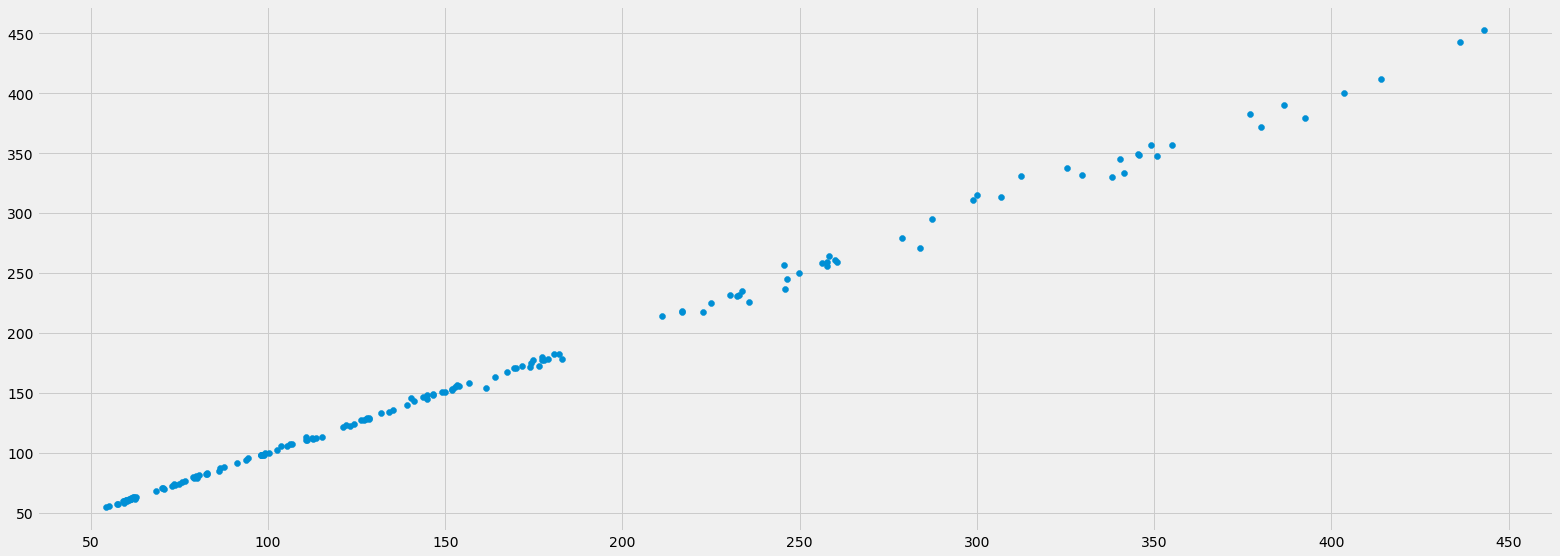

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.figure(figsize=(24.2,9))
#plt.scatter(df.index, df['TS_buy'], color = 'green', label = 'TS buy', marker = '^', alpha = 1)
#plt.scatter(df.index, df['TS_sell'], color = 'red', label = 'TS sell', marker = 'v', alpha = 1)
plt.scatter(y_predicate, y_test)
plt.show()

In [26]:
# to compare predicted and actual
pred_vs_actual.sort_index()

,predicted,actual
Date,,
2015-01-27,54.333736,54.279999
2015-02-05,55.212909,55.500000
2015-03-03,57.772108,57.320000
2015-03-04,57.382550,56.779999
2015-03-24,60.356268,59.779999
...,...,...
2020-11-10,392.488277,379.820007
2020-11-18,403.490873,399.950012
2020-12-18,436.365649,443.059998


In [27]:
show_diff = pred_vs_actual.sort_index().reset_index(drop=True)
show_diff

,predicted,actual
0,54.333736,54.279999
1,55.212909,55.500000
2,57.772108,57.320000
3,57.382550,56.779999
4,60.356268,59.779999
...,...,...
151,392.488277,379.820007
152,403.490873,399.950012
153,436.365649,443.059998
154,443.072942,452.679993


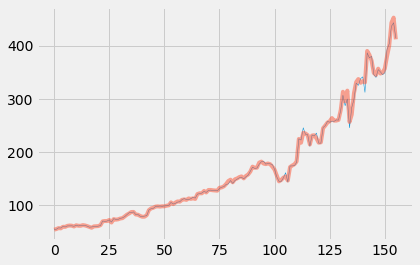

In [28]:
plt.plot(show_diff['predicted'], label='predicted', linewidth=0.5 )
plt.plot(show_diff['actual'], label='actual', alpha=0.5)
plt.show()

In [29]:
type(r_model)

sklearn.linear_model._base.LinearRegression

In [30]:
#save the model so don't need to train again and again...
# reference from https://scikit-learn.org/stable/modules/model_persistence.html
import pickle
linear_regression_model_MSCI_closePrice = pickle.dumps(r_model)
#to save model to a file use joblib

In [31]:
saved_model = pickle.loads(linear_regression_model_MSCI_closePrice)

In [32]:
x_test

,Open,pday_High,pday_Low,pday_Volume
Date,,,,
2015-07-09,62.360001,62.490002,61.529999,762600.0
2015-04-02,61.110001,61.509998,60.430000,748700.0
2017-08-23,112.400002,113.360001,110.550003,384900.0
2018-01-17,135.119995,136.770004,134.190002,265400.0
2018-03-02,141.160004,143.880005,141.089996,504100.0
...,...,...,...,...
2020-11-10,388.609985,437.350006,390.459991,1245800.0
2018-09-27,178.979996,180.479996,177.369995,363700.0
2021-01-08,443.649994,447.000000,436.260010,391200.0


Predict today's Closing Price

In [62]:
from datetime import date, timedelta
test4today = web.DataReader("MSCI", data_source='yahoo', start=date.today()-timedelta(3))
test4today['pday_High'] = test4today['High'].shift(1)
test4today['pday_Low'] = test4today['Low'].shift(1)
test4today['pday_Volume'] = test4today['Volume'].shift(1)
test4today.reset_index(drop=True, inplace=True)
test4today.drop(['Close', 'Adj Close', 'High', 'Low', 'Volume'], axis=1, inplace=True)
saved_model.predict(test4today.iloc[[-1]])

array([411.55358253])

In [64]:
manualInput = {'Open': [420], 'pday_High': [422.38], 'pday_Low': [413.03], 'pday_Volume': [342900.0] }
anotherTest2 = pd.DataFrame(manualInput)
anotherTest2

,Open,pday_High,pday_Low,pday_Volume
0,420,422.38,413.03,342900.0


In [65]:
saved_model.predict(anotherTest2)

array([419.38408494])

## Logical Regression

In [ ]:
import pandas as pd
import numpy as np
# from sklearn.datasets import load_breast_cancer
from pandas_datareader import data as web
import sklearn

In [82]:
df = web.DataReader("MSCI", data_source='yahoo', start='01-01-2015')
df['pday_High'] = df['High'].shift(1)
df['pday_Low'] = df['Low'].shift(1)
df['pday_Volume'] = df['Volume'].shift(1)
df['pday_Close'] = df['Close'].shift(1)
df

,High,Low,Open,Close,Volume,Adj Close,pday_High,pday_Low,pday_Volume,pday_Close
Date,,,,,,,,,,
2015-01-02,47.939999,46.930000,47.689999,47.689999,477500.0,44.373196,NaN,NaN,NaN,NaN
2015-01-05,47.590000,46.799999,47.430000,47.240002,814100.0,43.954487,47.939999,46.930000,477500.0,47.689999
2015-01-06,49.549999,47.540001,47.599998,48.610001,1961000.0,45.229206,47.590000,46.799999,814100.0,47.240002
2015-01-07,49.790001,48.439999,48.880001,49.720001,1257700.0,46.262001,49.549999,47.540001,1961000.0,48.610001
2015-01-08,51.270000,49.680000,50.060001,51.220001,1287600.0,47.657684,49.790001,48.439999,1257700.0,49.720001
...,...,...,...,...,...,...,...,...,...,...
2021-03-01,422.380005,413.029999,418.089996,420.029999,342900.0,420.029999,420.579987,409.440002,662200.0,414.519989
2021-03-02,429.559998,410.380005,420.000000,418.809998,726200.0,418.809998,422.380005,413.029999,342900.0,420.029999
2021-03-03,422.589996,409.429993,416.410004,409.720001,811200.0,409.720001,429.559998,410.380005,726200.0,418.809998


In [84]:
X = df.drop(['Close', 'Adj Close', 'High', 'Low', 'Volume'], axis=1).dropna()
X

,Open,pday_High,pday_Low,pday_Volume,pday_Close
Date,,,,,
2015-01-05,47.430000,47.939999,46.930000,477500.0,47.689999
2015-01-06,47.599998,47.590000,46.799999,814100.0,47.240002
2015-01-07,48.880001,49.549999,47.540001,1961000.0,48.610001
2015-01-08,50.060001,49.790001,48.439999,1257700.0,49.720001
2015-01-09,51.340000,51.270000,49.680000,1287600.0,51.220001
...,...,...,...,...,...
2021-03-01,418.089996,420.579987,409.440002,662200.0,414.519989
2021-03-02,420.000000,422.380005,413.029999,342900.0,420.029999
2021-03-03,416.410004,429.559998,410.380005,726200.0,418.809998


In [79]:
adjClose=df['Adj Close']
price_increase=adjClose.diff()
price_increase

Date
2015-01-02         NaN
2015-01-05   -0.418709
2015-01-06    1.274719
2015-01-07    1.032795
2015-01-08    1.395683
                ...   
2021-03-01    5.510010
2021-03-02   -1.220001
2021-03-03   -9.089996
2021-03-04   -0.720001
2021-03-05    5.720001
Name: Adj Close, Length: 1554, dtype: float64

In [143]:
price_increase[price_increase>0] = True
price_increase[price_increase<=0] = False
Y = price_increase.dropna()
Y = Y.astype('int') # OMG, this won't take boolean!
Y.describe()

count    1553.000000
mean        0.562138
std         0.496284
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Adj Close, dtype: float64

In [144]:
# Mark the training data, we use 90% data for training, 10% of the data to verify results
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.1 )
print(x_train.shape, y_train.shape)
type(y_train)

(1397, 5) (1397,)


pandas.core.series.Series

In [151]:
# train Logical Regression Model
from sklearn.linear_model import LogisticRegression
l_model = LogisticRegression(solver='liblinear').fit(x_train, y_train) # liblinear is for binary prediction/classification with small dataset

print("LogisticRegression Training score is: ", l_model.score(x_train, y_train))

LogisticRegression Training score is:  0.5669291338582677


In [157]:
# compare in the test dataset
y_predicate = l_model.predict(x_test)
pred_vs_actual = pd.DataFrame({'predicted': y_predicate, 'actual': y_test})
pred_vs_actual

,predicted,actual
Date,,
2016-04-26,1,1
2021-02-04,1,1
2020-11-11,1,1
2020-05-26,1,0
2017-04-26,1,1
...,...,...
2016-08-30,1,1
2019-01-16,1,1
2020-01-29,1,1


In [154]:
from sklearn.metrics import accuracy_score
print("Testing prediction and actual data correct ratio: ", accuracy_score(y_test, y_predicate))

Testing prediction and actual data correct ratio:  0.5192307692307693


# Parametric correlation analysis

## Pearson correlation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from pylab import rcParams
import pandas_datareader as web
import scipy
from scipy.stats.stats import pearsonr

%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use("seaborn-whitegrid")

df = web.DataReader("MSCI", "stooq", start="2020-01-01")
df

,Open,High,Low,Close,Volume
Date,,,,,
2021-08-04,620.77,627.5650,620.77,624.22,300899
2021-08-03,610.60,621.3200,601.43,619.07,321491
2021-08-02,600.12,614.6799,600.12,610.92,312996
2021-07-30,592.37,601.6914,591.84,595.96,279058
2021-07-29,592.00,597.5300,589.26,594.76,260673
...,...,...,...,...,...
2020-01-08,259.98,266.1000,259.98,263.45,534934
2020-01-07,257.82,262.2600,257.70,259.36,466124
2020-01-06,255.27,259.1000,253.81,259.00,456290


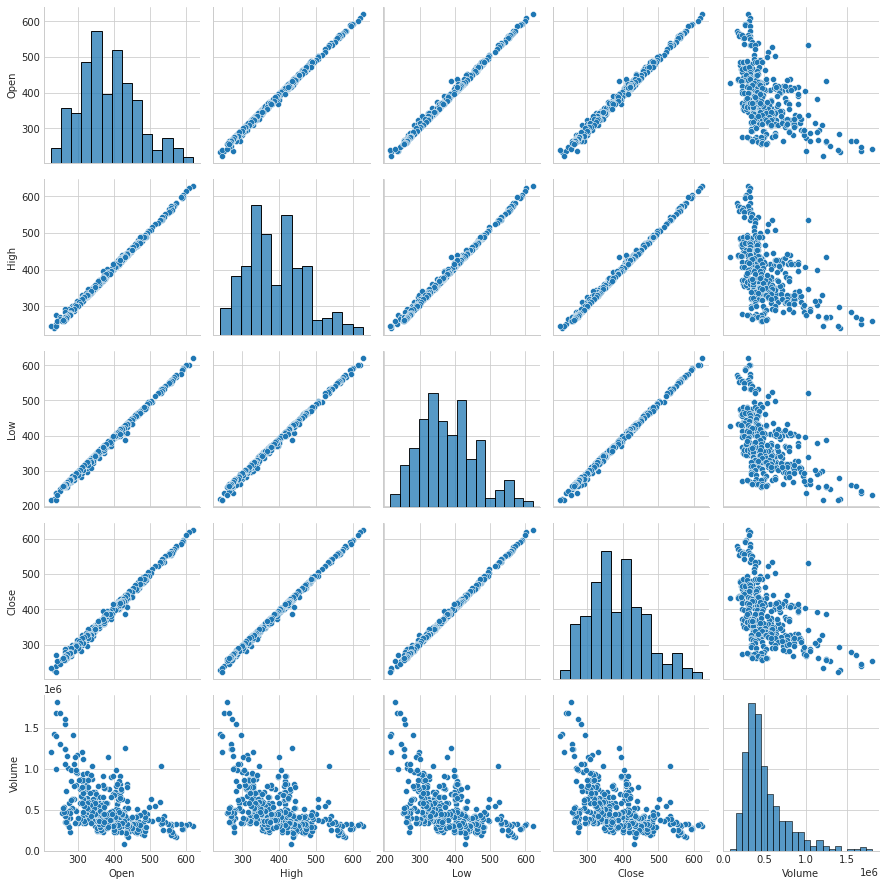

In [6]:
sn.pairplot(df)

Pearson correlation assume your data is 
1. normally distributed 
2. linearly correlated
3. Variables are continuous

In [12]:
# manually generate PearsonR coefficient r, which indicates correlation between -1, 0, +1
pearsonr_coefficient, p_value = pearsonr(df['High'], df['Low'])
print("High - Low    correlation is ", pearsonr_coefficient)
pearsonr_coefficient, p_value = pearsonr(df['Close'], df['High'])
print("High - Close  correlation is ", pearsonr_coefficient)
pearsonr_coefficient, p_value = pearsonr(df['Open'], df['High'])
print("High - OPen   correlation is ", pearsonr_coefficient)
pearsonr_coefficient, p_value = pearsonr(df['High'], df['Volume'])
print("High - Volume correlation is ", pearsonr_coefficient)

High - Low    correlation is  0.9976405712678705
High - Close  correlation is  0.9979689967116483
High - OPen   correlation is  0.9982444556501245
High - Volume correlation is  -0.4895105426121675


so it seems HLOC are highly correlated, but not correlated with Volume

In [13]:
# create correlation with dataframe
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.998244,0.997892,0.995509,-0.508094
High,0.998244,1.000000,0.997641,0.997969,-0.489511
Low,0.997892,0.997641,1.000000,0.998164,-0.525100
Close,0.995509,0.997969,0.998164,1.000000,-0.506291
Volume,-0.508094,-0.489511,-0.525100,-0.506291,1.000000


<AxesSubplot:>

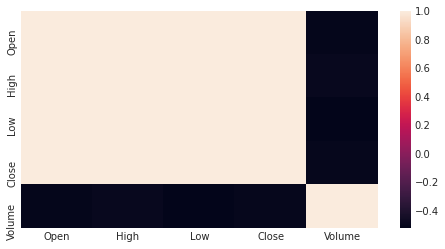

In [14]:
# use heatmap to visualize pearson correlation efficient
sn.heatmap(df.corr())